In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

In [23]:
data = pd.read_csv('C://Users/thdar/OneDrive/Desktop/diabetes_data_upload.csv')

In [24]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [25]:
# If you have multiple columns to convert, you can loop over them
for col in ['Polyuria', 'Polydipsia', 'sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
    
data['class'] = data['class'].map({'Positive': 1, 'Negative': 0})

data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})


In [26]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [32]:
scaler = MinMaxScaler()
# Fit the scaler to your data and transform it
data['age_scaled'] = scaler.fit_transform(data[['Age']])
data.drop('Age', axis=1, inplace=True)


In [33]:
data

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_scaled
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0.324324
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0.567568
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0.337838
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0.391892
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0.594595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0.310811
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0.432432
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0.567568
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0.216216


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              520 non-null    int64  
 1   Polyuria            520 non-null    int64  
 2   Polydipsia          520 non-null    int64  
 3   sudden weight loss  520 non-null    int64  
 4   weakness            520 non-null    int64  
 5   Polyphagia          520 non-null    int64  
 6   Genital thrush      520 non-null    int64  
 7   visual blurring     520 non-null    int64  
 8   Itching             520 non-null    int64  
 9   Irritability        520 non-null    int64  
 10  delayed healing     520 non-null    int64  
 11  partial paresis     520 non-null    int64  
 12  muscle stiffness    520 non-null    int64  
 13  Alopecia            520 non-null    int64  
 14  Obesity             520 non-null    int64  
 15  class               520 non-null    int64  
 16  age_scal

In [35]:
correlation_matrix = data.corr()

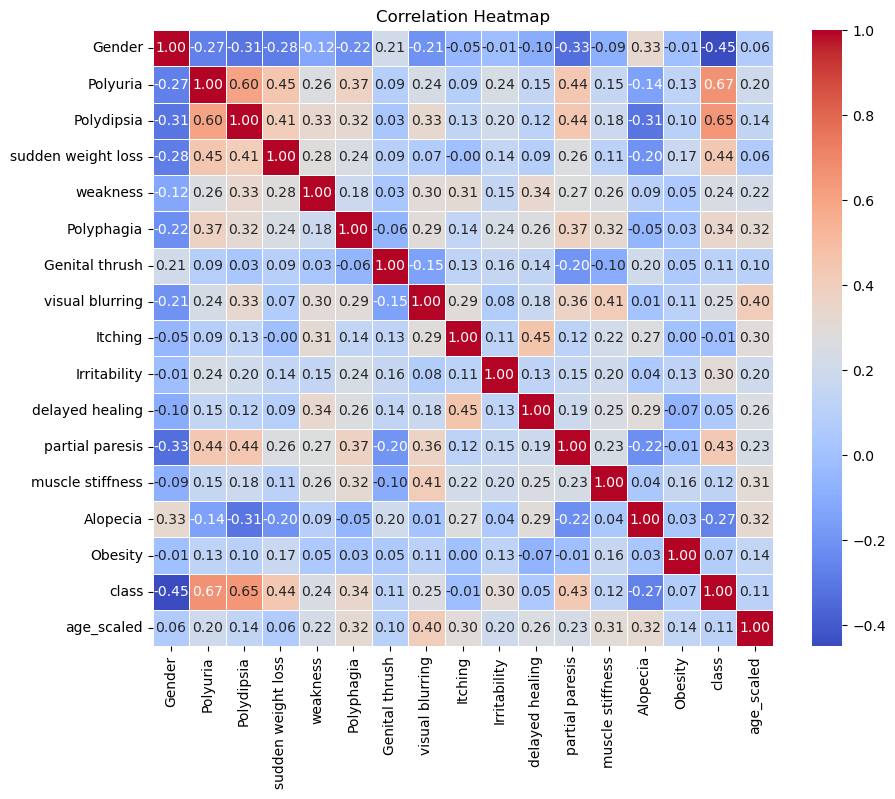

In [40]:

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and show plot
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Separating Target feature
X = data.drop(['class'], axis=1)
y = data['class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 42)

In [48]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())


Distribution of target variable in training set
class
1    256
0    160
Name: count, dtype: int64
Distribution of target variable in test set
class
1    64
0    40
Name: count, dtype: int64


## Logistic Regression

In [56]:
# Logistic Regression
logi = LogisticRegression(random_state = 42, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
# Cross Validation
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.922938443670151

In [58]:
# Model Evaluation
y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(), prec, rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.942308,0.922938,0.983333,0.921875,0.951613,0.948437


## Random forest

In [59]:
# Random Forest
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
# Cross Validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9783972125435539

In [63]:
# Model Evaluation
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rf.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.980769,0.978397,0.984375,0.984375,0.984375,0.979688


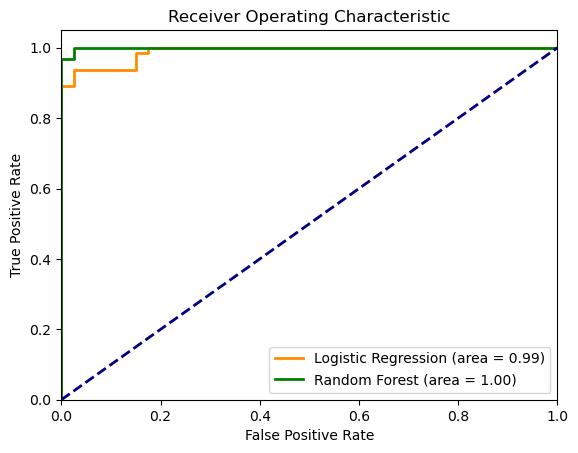

In [65]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set - Logistic Regression
logistic_probs = logi.predict_proba(X_test)[:, 1]

# Predict probabilities for test set - Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Logistic Regression
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plotting ROC curve
plt.figure()
lw = 2
plt.plot(logistic_fpr, logistic_tpr, color='darkorange', lw=lw, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='green', lw=lw, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [68]:
import pickle
# File paths to save the pickle files
logistic_file_path = 'logistic_regression.pkl'
rf_file_path = 'random_forest.pkl'

# Exporting Logistic Regression model
with open(logistic_file_path, 'wb') as f:
    pickle.dump(logi, f)

print("Logistic Regression model saved successfully.")

# Exporting Random Forest model
with open(rf_file_path, 'wb') as f:
    pickle.dump(rf, f)

print("Random Forest model saved successfully.")

Logistic Regression model saved successfully.
Random Forest model saved successfully.
